In [1]:
include("../src/SPECTrecon.jl")

Main.SPECTrecon

In [2]:
using Main.SPECTrecon: imrotate3!, imrotate3_adj!
using MIRTjim: jim
using LinearInterpolators: SparseInterpolator, LinearSpline
using ImageFiltering: padarray, Fill
using ImageTransformations: imrotate
using Interpolations: Linear
using OffsetArrays
using Plots: savefig

┌ Info: Precompiling ImageTransformations [02fcd773-0e25-5acc-982a-7f6622650795]
└ @ Base loading.jl:1342


In [3]:
"""
`imrotate3-1d` visualization
"""
function imrotate3_1d_vis()
    T = Float32
    M = 100
    N = 100
    pad_x = ceil(Int, 1 + M * sqrt(2)/2 - M / 2)
    pad_y = ceil(Int, 1 + N * sqrt(2)/2 - N / 2)
    workvec_x = zeros(T, M + 2 * pad_x)
    workvec_y = zeros(T, N + 2 * pad_y)
    A_x = SparseInterpolator(LinearSpline(T), workvec_x, length(workvec_x))
    A_y = SparseInterpolator(LinearSpline(T), workvec_y, length(workvec_y))
    img = zeros(T, M, N)
    img[30:50, 20:60] .= 1
    output = similar(img)
    workmat1 = OffsetArrays.no_offset_view(padarray(img, Fill(0, (pad_x, pad_y))))
    workmat2 = similar(workmat1)
    θ = 3*π/16
    imrotate3!(output, workmat1, workmat2, img, θ, A_x, A_y, workvec_x, workvec_y)
    output2 = imrotate(img, -θ, axes(img), method = Linear(), fill = 0)
    return output, output2
end

imrotate3_1d_vis

In [4]:
"""
`imrotate3_1d_adj` visualization
"""
function imrotate3_1d_adj_vis()
    T = Float32
    M = 100
    N = 100
    pad_x = ceil(Int, 1 + M * sqrt(2)/2 - M / 2)
    pad_y = ceil(Int, 1 + N * sqrt(2)/2 - N / 2)
    workvec_x = zeros(T, M + 2 * pad_x)
    workvec_y = zeros(T, N + 2 * pad_y)
    A_x = SparseInterpolator(LinearSpline(T), workvec_x, length(workvec_x))
    A_y = SparseInterpolator(LinearSpline(T), workvec_y, length(workvec_y))
    img = zeros(T, M, N)
    img[30:50, 20:60] .= 1
    output = similar(img)
    workmat1 = OffsetArrays.no_offset_view(padarray(img, Fill(0, (pad_x, pad_y))))
    workmat2 = similar(workmat1)
    θ = 3π/16
    imrotate3_adj!(output, workmat1, workmat2, img, θ, A_x, A_y, workvec_x, workvec_y)
    output2 = imrotate(img, θ, axes(img), method = Linear(), fill = 0)
    return output, output2
end

imrotate3_1d_adj_vis

In [5]:
function imrotate3_2d_vis()
    T = Float32
    M = 100
    N = 100
    pad_x = ceil(Int, 1 + M * sqrt(2)/2 - M / 2)
    pad_y = ceil(Int, 1 + N * sqrt(2)/2 - N / 2)
    img = zeros(T, M, N)
    img[30:60,20:70] .= 1
    output = similar(img)
    workmat1 = OffsetArrays.no_offset_view(padarray(img, Fill(0, (pad_x, pad_y))))
    workmat2 = similar(workmat1)
    θ = 3π/16
    imrotate3!(output, workmat1, workmat2, img, θ)
    output2 = imrotate(img, -θ, axes(img), method = Linear(), fill = 0)
    return output, output2
end

imrotate3_2d_vis (generic function with 1 method)

In [6]:
function imrotate3_2d_adj_vis()
    T = Float32
    M = 100
    N = 100
    pad_x = ceil(Int, 1 + M * sqrt(2)/2 - M / 2)
    pad_y = ceil(Int, 1 + N * sqrt(2)/2 - N / 2)
    img = zeros(T, M, N)
    img[30:60,20:70] .= 1
    output = similar(img)
    workmat1 = OffsetArrays.no_offset_view(padarray(img, Fill(0, (pad_x, pad_y))))
    workmat2 = similar(workmat1)
    θ = 3π/16
    imrotate3_adj!(output, workmat1, workmat2, img, θ)
    output2 = imrotate(img, θ, axes(img), method = Linear(), fill = 0)
    return output, output2
end

imrotate3_2d_adj_vis (generic function with 1 method)

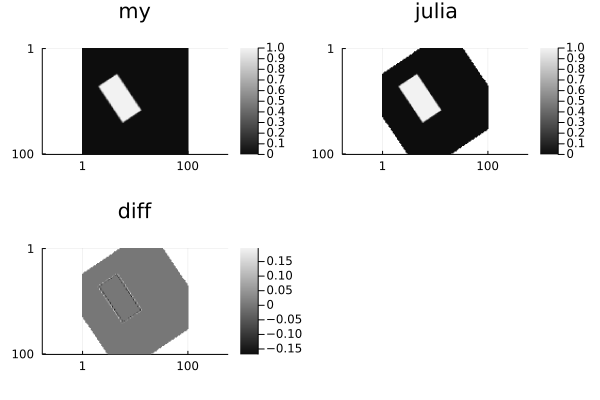

In [7]:
# make figures
imo_1d_adj, imj_1d_adj = imrotate3_1d_adj_vis()
jim(jim(imo_1d_adj, "my"), jim(imj_1d_adj, "julia"), jim(imo_1d_adj - imj_1d_adj, "diff"))
# savefig("rotate3_1d.pdf")

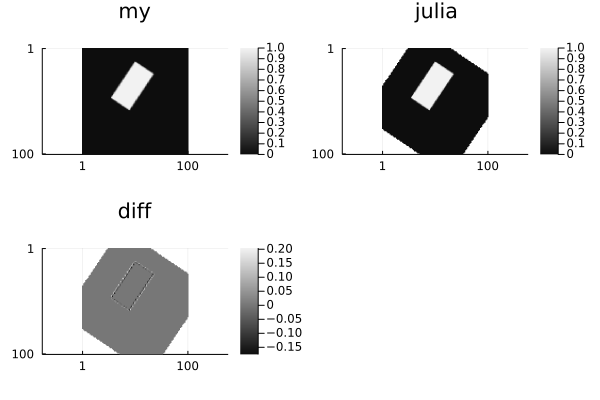

In [8]:
imo_1d, imj_1d = imrotate3_1d_vis()
jim(jim(imo_1d, "my"), jim(imj_1d, "julia"), jim(imo_1d - imj_1d, "diff"))
# savefig("rotate3_1d_adj.pdf")

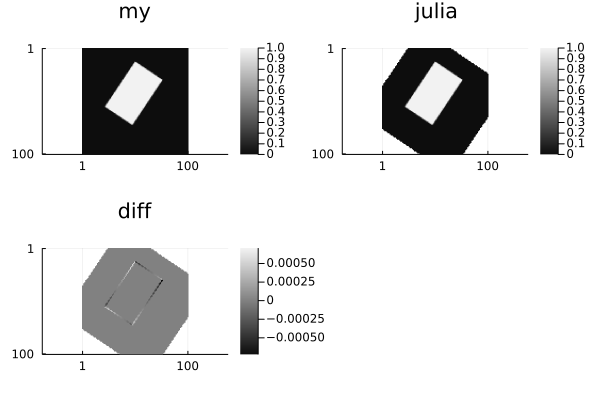

In [9]:
imo_2d, imj_2d = imrotate3_2d_vis()
jim(jim(imo_2d, "my"), jim(imj_2d, "julia"), jim(imo_2d - imj_2d, "diff"))
# savefig("rotate3_2d.pdf")

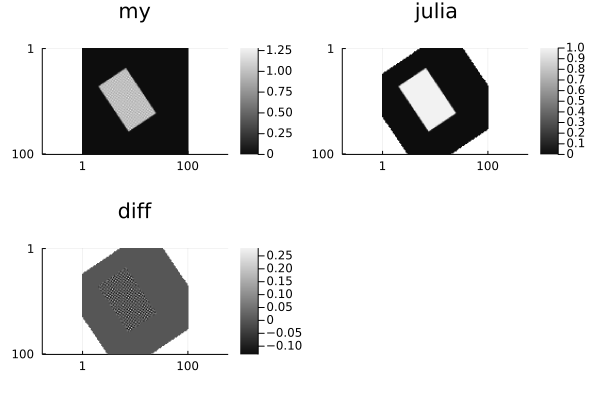

In [10]:
imo_2d_adj, imj_2d_adj = imrotate3_2d_adj_vis()
jim(jim(imo_2d_adj, "my"), jim(imj_2d_adj, "julia"), jim(imo_2d_adj - imj_2d_adj, "diff"))
# savefig("rotate3_2d_adj.pdf")